In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [6]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()

In [8]:
data = [
    ("2025-07-01", "Product A", 10, 20.0),
    ("2025-07-01", "Product B", 5, 50.0),
    ("2025-07-02", "Product A", 7, 20.0),
    ("2025-07-02", "Product C", 3, 100.0),
    ("2025-07-03", "Product B", 2, 50.0),
    ("2025-07-03", "Product C", 8, 30.0),
]

cursor.executemany("INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)", data)
conn.commit()

In [10]:
query = """
SELECT product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

     product  total_qty  revenue
0  Product A         17    340.0
1  Product B          7    350.0
2  Product C         11    540.0


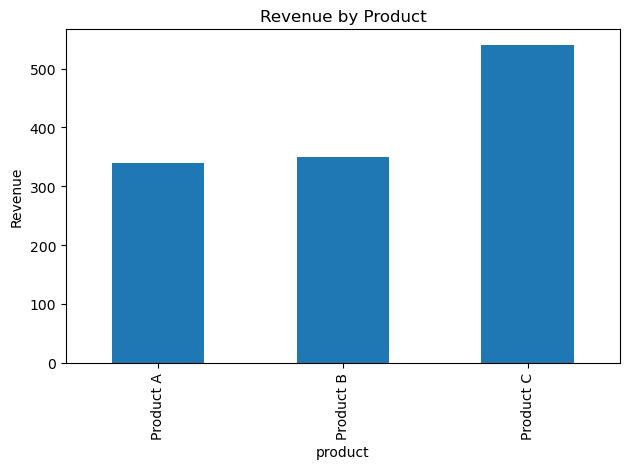

In [14]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

conn.close()